<a href="https://colab.research.google.com/github/xx529/Risk-Control-Detect/blob/main/youchu%20%E6%AF%94%E8%B5%9B/youchu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Project/Risk Control & Detect/邮储内部比赛/youchu-tra-resolve-zscore-pre-12.csv', header=None)
df_data = df_data[[x for x in range(88)]]
df_train = df_data[[x for x in range(87)]]
df_label = df_data[87]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128463 entries, 0 to 128462
Data columns (total 88 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       128463 non-null  float64
 1   1       128463 non-null  float64
 2   2       128463 non-null  float64
 3   3       128463 non-null  float64
 4   4       128463 non-null  float64
 5   5       128463 non-null  float64
 6   6       128463 non-null  float64
 7   7       128463 non-null  float64
 8   8       128463 non-null  float64
 9   9       128463 non-null  float64
 10  10      128463 non-null  float64
 11  11      128463 non-null  float64
 12  12      128463 non-null  float64
 13  13      128463 non-null  float64
 14  14      128463 non-null  float64
 15  15      128463 non-null  float64
 16  16      128463 non-null  float64
 17  17      128463 non-null  float64
 18  18      128463 non-null  float64
 19  19      128463 non-null  float64
 20  20      128463 non-null  float64
 21  21      12

In [4]:
df_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,-0.109759,-1.307010,-0.125897,-1.594796,-1.56100,-1.420724,-0.976915,-0.782125,-0.531181,-0.099734,-0.09972,-0.099705,-0.181364,-0.181358,-0.181352,-0.436879,-0.431592,-0.286241,-0.234562,-0.234562,-0.187097,-0.169651,-0.015657,-0.016787,-0.029478,-0.032572,-0.024366,-0.027654,-0.102055,-0.018505,-0.102806,-0.069462,-0.243487,-0.045921,-0.233324,1.222482,3.023960,0.166484,2.586474,6.855787,...,-0.012843,-0.018938,-0.130064,-0.047046,-0.060224,-0.150758,-0.151818,0.712473,-0.984973,0.567178,2.395734,-0.144071,1.371645,0.326006,2.052748,-0.331067,-0.331293,-0.009395,-0.024432,-0.241300,-0.331263,-0.240694,-0.24001,-0.212944,-0.116523,-0.112328,-0.088717,-0.116856,-0.146674,-0.218823,-0.046367,-0.043374,-0.050487,-0.034458,-0.033371,-0.07273,-0.005412,-0.00505,-0.005851,0
1,-0.109728,-0.269881,-0.125890,0.541072,0.50015,0.379127,0.478312,0.415051,0.329315,-0.099675,-0.09968,-0.099686,-0.132847,-0.132849,-0.132852,1.788332,3.717229,-0.286241,-0.234562,-0.234562,-0.187097,-0.169651,-0.015657,-0.016787,-0.029478,-0.032572,-0.024366,-0.027654,-0.102055,-0.018505,-0.102806,-0.069462,-0.243487,-0.045921,-0.233324,-0.201029,-0.378149,-0.118234,-0.393381,-0.249054,...,-0.012843,-0.018938,-0.130064,-0.047046,-0.060224,-0.150758,-0.151818,-1.302122,-0.984973,0.567178,-0.376486,-0.144071,1.371645,-0.202572,1.984203,-0.331067,-0.331293,-0.009395,-0.024432,-0.241300,-0.331263,-0.240694,-0.24001,-0.212944,-0.116523,-0.112328,-0.088717,0.142536,0.143560,0.330057,-0.040332,-0.040564,-0.046797,-0.034458,-0.033371,-0.07273,-0.005412,-0.00505,-0.005851,0
2,-0.109759,-1.307010,-0.125897,-1.594796,-1.56100,-1.420724,-0.976915,-0.782125,-0.531181,-0.099734,-0.09972,-0.099705,-0.181364,-0.181358,-0.181352,-0.436879,-0.431592,-0.286241,-0.234562,-0.234562,-0.187097,-0.169651,-0.015657,-0.016787,-0.029478,-0.032572,-0.024366,-0.027654,-0.102055,-0.018505,-0.102806,-0.069462,-0.243487,-0.045921,-0.233324,-0.201029,-0.378149,-0.118234,-0.393381,-0.249054,...,-0.012843,-0.018938,-0.130064,-0.047046,-0.060224,-0.150758,-0.151818,0.712473,1.015249,0.567178,-0.376486,-0.144071,1.371645,-0.204801,-0.072156,-0.331067,-0.331293,-0.009395,-0.024432,-0.241300,-0.331263,-0.240694,-0.24001,-0.212944,-0.116523,-0.112328,-0.088717,-0.116856,-0.146674,-0.218823,-0.046367,-0.043374,-0.050487,-0.034458,-0.033371,-0.07273,-0.005412,-0.00505,-0.005851,0
3,-0.109728,-0.269881,-0.125890,0.541072,0.50015,0.379127,0.842119,0.814109,0.759564,-0.099675,-0.09968,-0.099686,0.091426,0.091424,0.091421,1.788332,3.717229,-0.286241,-0.234562,-0.234562,-0.187097,-0.169651,-0.015657,-0.016787,-0.029478,-0.032572,-0.024366,-0.027654,-0.102055,-0.018505,-0.102806,-0.069462,-0.243487,-0.045921,-0.233324,-0.201029,-0.378149,-0.118234,-0.393381,-0.249054,...,-0.012843,-0.018938,-0.130064,-0.047046,-0.060224,-0.150758,-0.151818,-1.302122,-0.984973,0.567178,-0.376486,-0.144071,1.371645,-0.076399,1.658612,-0.331067,-0.331293,-0.009395,-0.024432,-0.241300,-0.331263,-0.240694,-0.24001,-0.212944,-0.116523,-0.112328,-0.088717,-0.064978,-0.082177,0.055617,-0.044552,-0.042033,-0.050473,-0.034458,-0.033371,-0.07273,-0.005412,-0.00505,-0.005851,0
4,-0.109728,-0.269881,-0.125890,0.541072,0.50015,0.379127,0.478312,0.415051,0.329315,-0.099675,-0.09968,-0.099686,-0.073964,-0.073967,-0.073969,1.788332,3.717229,-0.286241,-0.234562,-0.234562,-0.187097,-0.169651,-0.015657,-0.016787,-0.029478,-0.032572,-0.024366,-0.027654,-0.102055,-0.018505,-0.102806,-0.069462,-0.243487,-0.045921,-0.233324,-0.201029,-0.378149,-0.118234,-0.393381,-0.249054,...,-0.012843,-0.018938,-0.130064,-0.047046,-0.060224,-0.150758,-0.151818,0.712473,1.015249,0.567178,-0.376486,-0.144071,1.371645,-0.142752,2.069884,-0.331067,-0.331293,-0.009395,-0.024432,-0.241300,-0.331263,-0.240694,-0.24001,-0.212944,-0.1165

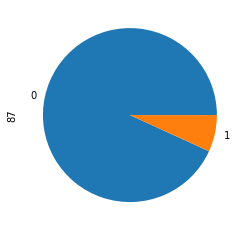

In [5]:
df_data[87].value_counts().plot(kind='pie')
plt.show()

In [6]:
df_data[87].value_counts() / len(df_data)

0    0.9317
1    0.0683
Name: 87, dtype: float64

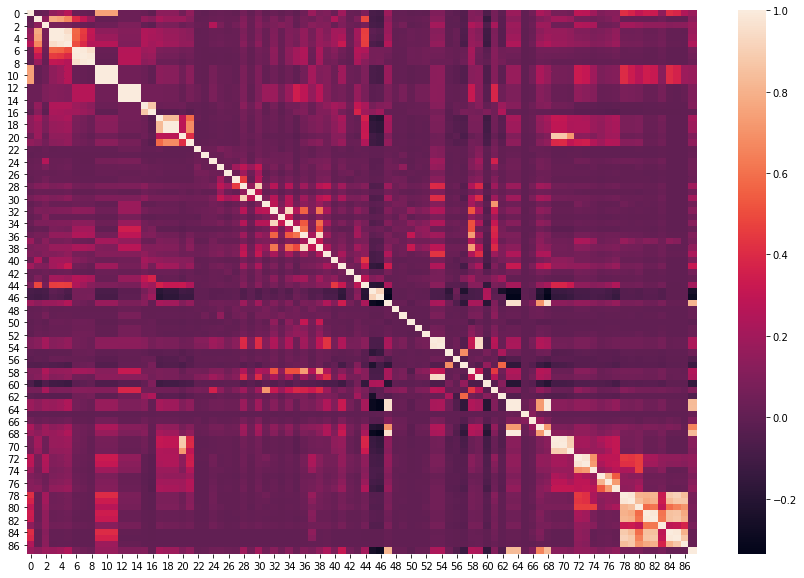

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_data.corr().values)
plt.show()

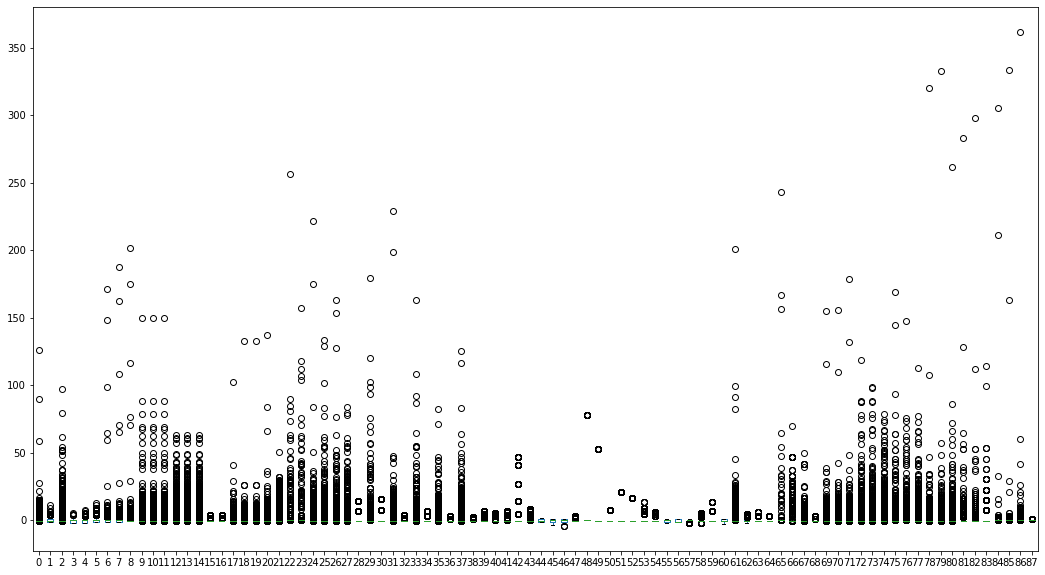

In [8]:
pd.DataFrame(df_data).plot(kind='box', figsize=(18, 10))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score

x_train, x_test, y_train, y_test = train_test_split(df_train, df_label)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
pre = lr.predict(x_test)

f1_score(pre, y_test), precision_score(pre, y_test), recall_score(pre, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.8352284473847427, 0.9253321117727897, 0.7611152976639035)